#  House Price Prediction Analysis

In this project, I have tried to find the the best variables and better performing model for house price predictions with two different approaches of  Regression analysis:

    The first one is by keeping most of the data as is (i.e. without enough cleaning) and using basic models

    The second one  is by removing irrelevant data by applying advanced data cleaning & model tuning techniques

Result:
Second approach, using HyperParamter Tuning on Random Forest Regression with better cleaned data provided the best results among all the different approaches applied

## Topics

#### 1.0 Importing packages and loading data
    
    1.1 Exploratory Data Analysis (EDA)
    

#### 2.0 First Approach : By removing MisFit data

    2.1 Removing Outliers
    
    2.2 Data Cleaning
    
    2.3 Dataset Splitting
    
    2.4 Linear model with first approach (Partially cleaned dataset)
    
    2.5 QQ Plot of Linear Model Residuals
    
    2.6 Linear model Evaluation
    
    2.7 Random Forest Regression with first approach (Partially cleaned dataset)
    
        2.7.1 Feature Importance 
        
        
#### 3.0 Second Approach by removing more irrelevant data and better Cleaning

    3.1 Outlier Removal Using Distribution Percentage
    
    3.2 Outlier Removal using Inter Quartile Range
    
    3.3 One Hot Encoding of Categorical Parameters
    
    3.4 Varaiance Inflation Factor with Second Approach
    
    3.5 Splitting Dataset for 2nd Approach
    
    3.6 Hyper Parameter Tuning
    
        3.6.1 GridSearchCV
        
        3.6.2 Base Model (RandomForest) Metrics
        
    3.7 Hyperparameter Tuned (GridSearch) Model Metrics
    
        3.7.1 Metrics Improvement in Tuned Model 
        
        3.8 QQ Plot of HyperParameter Tuned (Random Forest) Model Residuals
     
#### 4.0 Results & Conclusion



## 1.0 Importing packages and loading data

Import all the required packages and load the  Iceland_House_Prediction.csv dataset downaloaded from Iceland University website https://www.skra.is/

In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import sklearn.metrics as skmet
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
import random
import tabulate
%matplotlib inline

In [2]:
# Loading Dataset from the local directory

Data=pd.read_csv('Iceland_House_Prediction.csv')

#Display dataframe

Data

,ID of real estate,Date Of Purchase,Value Of Real estate,Type Of Property,Id Of municipality,Year Of Construction,Floor Number,Elevator available,Square Meters Of Property,No. Of Floors,...,No. of showers,No. of Toilets,No. of Kitchens,No. of rooms,No. of living rooms,No. of storage spaces,Measurement of completeness,Location Of Property,Sub-location property,Type of property
0,10580956,02/11/2011,18636,Residential House,0,01/01/1970,2,0,117.0,1,...,0,1,1,3,1,2,10.0,200,0,12
1,10779688,31/10/2011,17533,Residential House,0,01/01/1953,0,0,67.9,1,...,1,1,1,1,1,1,10.0,70,0,12
2,10712711,07/10/2011,14472,Residential House,0,01/01/1921,0,0,45.7,1,...,1,1,1,1,1,0,10.0,20,0,12
3,10774018,28/10/2011,14850,Residential House,0,01/01/1967,1,0,78.1,1,...,0,1,1,2,1,1,10.0,200,0,12
4,10891899,03/11/2011,20831,Residential House,0,01/01/1952,0,0,87.4,1,...,0,1,1,2,1,2,10.0,70,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34860,10719030,01/11/2011,25133,Town House,0,01/01/1981,1,0,128.2,2,...,0,2,1,4,2,0,10.0,160,0,11
34861,10077682,02/11/2011,14700,Residential House,0,01/01/1970,1,0,38.7,1,...,1,1,1,1,1,1,10.0,280,0,12
34862,10298834,26/10/2011,44896,Villa,0,01/01/1981,1,0,222.4,3,...,1,2,1,6,2,0,10.0,150,0,11
34863,10306230,02/11/2011,11698,Residential House,0,01/01/1975,2,0,48.4,1,...,0,1,1,1,1,0,10.0,160,0,12


## 1.1 Exploratory Data Analysis (EDA)

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34865 entries, 0 to 34864
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID of real estate            34865 non-null  int64  
 1   Date Of Purchase             34865 non-null  object 
 2   Value Of Real estate         34865 non-null  int64  
 3   Type Of Property             34865 non-null  object 
 4   Id Of municipality           34865 non-null  int64  
 5   Year Of Construction         34862 non-null  object 
 6   Floor Number                 34865 non-null  int64  
 7   Elevator available           34865 non-null  int64  
 8   Square Meters Of Property    34865 non-null  float64
 9   No. Of Floors                34865 non-null  int64  
 10  No. Of Parking spaces        34865 non-null  int64  
 11  No. of Bath Tubs             34865 non-null  int64  
 12  No. of showers               34865 non-null  int64  
 13  No. of Toilets  

In [4]:
# Checking list of headers/columns

print(Data.columns)

Index(['ID of real estate', 'Date Of Purchase', 'Value Of Real estate',
       'Type Of Property', 'Id Of municipality', 'Year Of Construction',
       'Floor Number', 'Elevator available', 'Square Meters Of Property',
       'No. Of Floors', 'No. Of Parking spaces', 'No. of Bath Tubs',
       'No. of showers', 'No. of Toilets', 'No. of Kitchens', 'No. of rooms',
       'No. of living rooms', 'No. of storage spaces',
       'Measurement of completeness', 'Location Of Property',
       'Sub-location property', 'Type of property'],
      dtype='object')


In [5]:
# Shortening column names to properly fit in visualizations and to be comfortably used in the code.

Data.rename(columns={'ID of real estate':'Id', 'Date Of Purchase':'SaleDate', 'Value Of Real estate':'Price',
       'Type Of Property':'PropertyType', 'Id Of municipality':'MunicipalityId', 'Year Of Construction':'YearBuilt',
       'Floor Number':'FloorN', 'Elevator available':'ElevatorE', 'Square Meters Of Property':'M2',
       'No. Of Floors':'NFloor', 'No. Of Parking spaces':'NParking', 'No. of Bath Tubs':'NBathTub',
       'No. of showers':'NShowers', 'No. of Toilets':'NToilets', 'No. of Kitchens':'NKitchens', 'No. of rooms':'NRooms',
       'No. of living rooms':'NLivingroom', 'No. of storage spaces':'NStorages',
       'Measurement of completeness':'Completeness', 'Location Of Property':'Location',
       'Sub-location property':'Sublocation', 'Type of property':'TypeofProperty'},  inplace=True)



In [6]:
# To find unique values of PropertyType column

set(Data['PropertyType']) # To know the values of PropertyType enum

{'Residential House', 'Semi-Detached House', 'Town House', 'Villa'}

In [7]:
# Mapping string to numbers to make it compatible for Regression models

for i in range(len(Data)):   
    if Data['PropertyType'][i]=='Residential House':
        Data['TypeofProperty'][i]=1
    elif Data['PropertyType'][i]=='Semi-Detached House':
        Data['TypeofProperty'][i]=2
    elif Data['PropertyType'][i]=='Town House':
        Data['TypeofProperty'][i]=3
    else:
        Data['TypeofProperty'][i]=4
        

C:\Users\farha\AppData\Local\Temp\ipykernel_1984\284568469.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['TypeofProperty'][i]=1
C:\Users\farha\AppData\Local\Temp\ipykernel_1984\284568469.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['TypeofProperty'][i]=4
C:\Users\farha\AppData\Local\Temp\ipykernel_1984\284568469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['TypeofProperty'][i]=2
C:\Users\farha\AppDat

In [8]:
# Feature Engineering: Dropping unnecessary columns which are just identifiers

Data= Data.drop(["Id", "MunicipalityId", "Sublocation", "PropertyType"], axis=1) 

In [9]:
Data.describe()

,Price,FloorN,ElevatorE,M2,NFloor,NParking,NBathTub,NShowers,NToilets,NKitchens,NRooms,NLivingroom,NStorages,Completeness,Location,TypeofProperty
count,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.00000,34865.000000,34865.000000
mean,28381.167905,1.873311,0.321239,107.074470,1.213280,0.150724,0.786347,0.528295,1.196042,1.006109,2.618414,1.220909,0.550667,9.95048,1595.087452,1.684354
std,14383.782264,1.437303,0.808793,44.372459,0.469285,0.397219,0.435671,0.565428,0.459558,0.159027,1.352502,0.514603,0.675082,0.46213,2464.155042,1.162597
min,400.000000,-1.000000,0.000000,17.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,11.000000,1.000000
25%,19124.000000,1.000000,0.000000,77.500000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,10.00000,130.000000,1.000000
50%,25461.000000,1.000000,0.000000,98.600000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,10.00000,340.000000,1.000000
75%,34493.000000,2.000000,0.000000,125.900000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,10.00000,2040.000000,2.000000
max,203781.000000,16.000000,8.000000,618.400000,4.000000,25.000000,6.000000,4.000000,5.000000,4.000000,32.000000,20.000000,9.000000,10.00000,8200.000000,4.000000


In [10]:
# List of filtered Columns/Parameters
L=['FloorN','ElevatorE','M2','NFloor','NParking','NBathTub','NShowers','NToilets','NKitchens','NRooms','NLivingroom','NStorages','Completeness']



In [11]:
plot_dims = (14, 9)
L=list(set(L)-{'M2'})

[Text(0.5, 0, 'Coloums'), Text(0, 0.5, 'Numbers')]

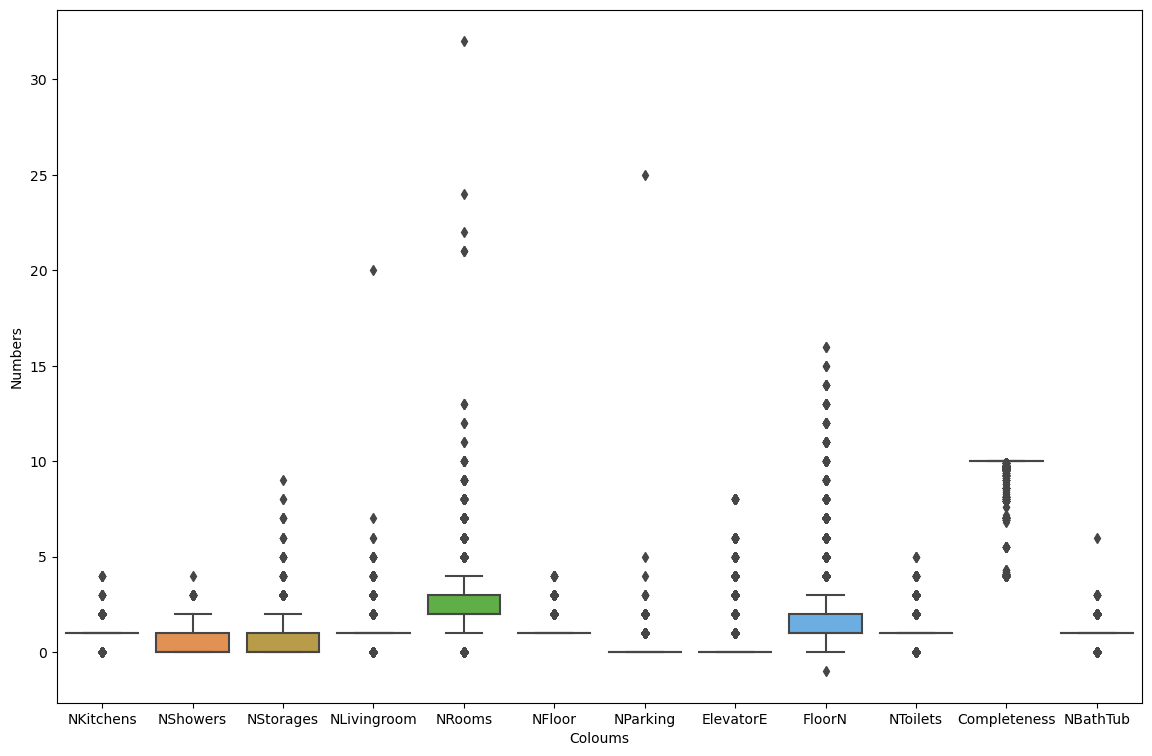

In [12]:
# Plotting BoxPlot to visualize outliers and range of values in each parameters

fig, ax = plt.subplots(figsize=plot_dims)
sn.boxplot( data=Data[L])
ax.set(xlabel='Coloums', ylabel='Numbers')

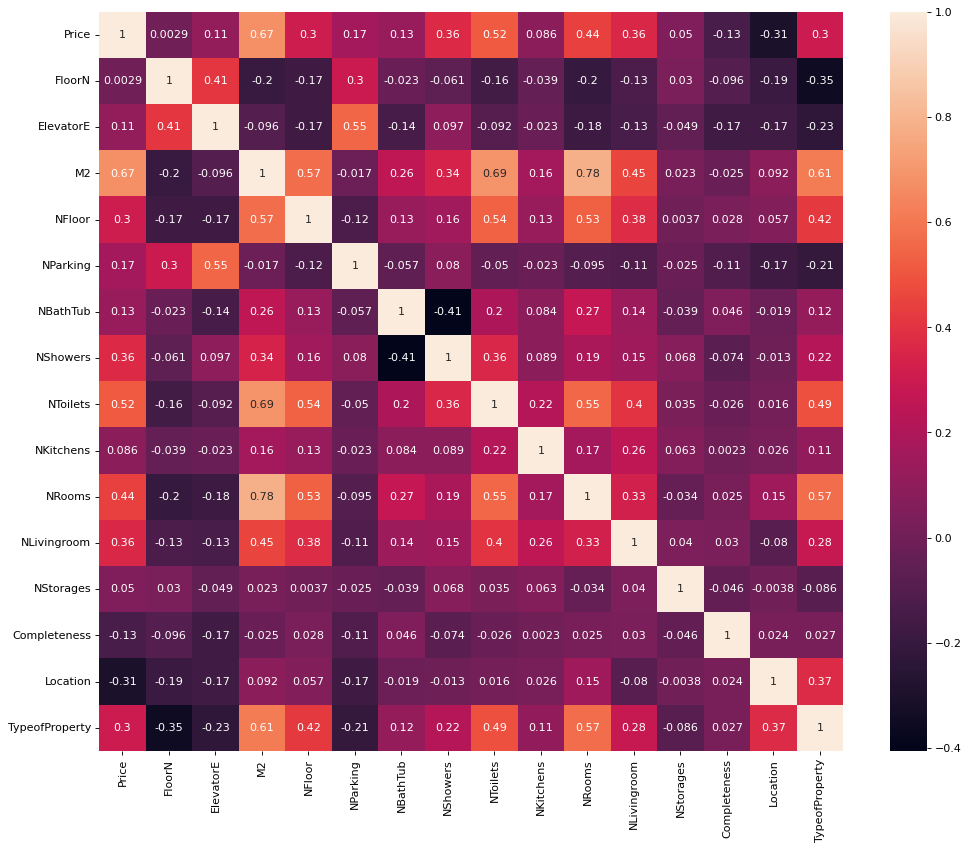

In [13]:
#Plotting Correlation Matrix

plt.figure(figsize=(15, 12), dpi=80)
corrMatrix = Data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# 2.0 First Approach : By removing MisFit data

## 2.1 Removing Outliers 

In [14]:
# Outlier removal inferred from box plot
# Keeping usual no of rooms, living rooms & parkings.

Data=Data[(Data.NRooms<8)& ( Data.NLivingroom <4)& (Data.NParking<4) ] 
index= [i for i in range(len(Data))]
Data['index']=index
Data.set_index('index', inplace=True)

In [15]:
def convertToDateTime(df, columnName, dateFormat = "%d/%m/%Y"):
    return pd.to_datetime(df[columnName], format=dateFormat)

In [16]:
Data["SaleDate"] = convertToDateTime(Data, "SaleDate").dt.year
Data["YearBuilt"] = convertToDateTime(Data, "YearBuilt").dt.year

[Text(0.5, 0, 'Coloums'), Text(0, 0.5, 'Numbers')]

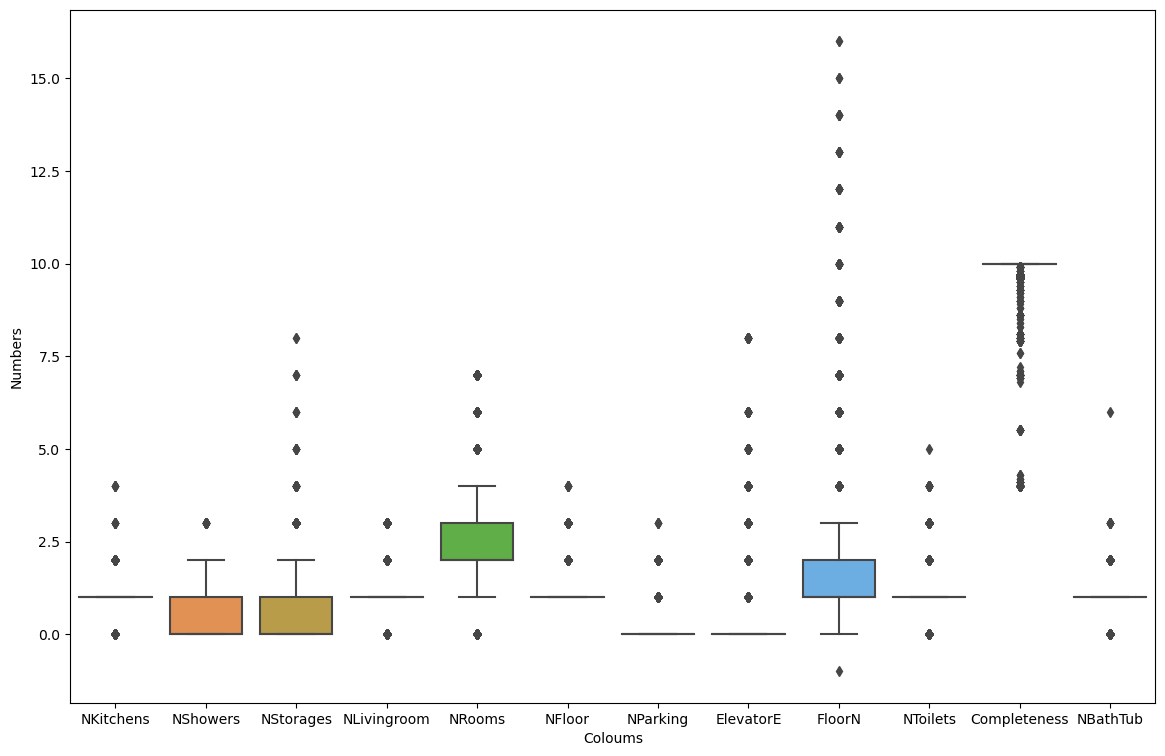

In [17]:
L=list(set(L)-{'M2'})
fig, ax = plt.subplots(figsize=plot_dims)
sn.boxplot( data=Data[L])
ax.set(xlabel='Coloums', ylabel='Numbers')

## 2.2 Data Cleaning
    
    2.2.1 Removing Null Values
    2.2.2 Dropping NaN Values
    2.2.3 Dropping infinite values
    2.2.4 Dropping irrelevant Columns

In [18]:
# Function for data cleaning
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"  # Removing NULL
    df.dropna(inplace=True)  # Removing row which has null value for any of the column
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)  # Removing row with NAN, infinity and negative infinity values
    return df[indices_to_keep].astype(np.float64)

In [19]:
Data=clean_dataset(Data)

In [20]:
# Furher filtering to improve accuracy, dropped M2 and Completeness
X=Data.drop(['Price', 'M2', 'Completeness' ], axis=1).values 
y=Data['Price'].values

## 2.3 Dataset Splitting

In [21]:
# Splitting Dataset - 80% train 20% test

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)  

## 2.4 Linear model with first approach (Partially cleaned dataset)

In [22]:
# Creating & fitting LinerarRegression model Object
reg = LinearRegression().fit(X_train, y_train)


In [23]:
# Predicting House Prices using Linear Reg Model
y_pred=reg.predict(X_test)

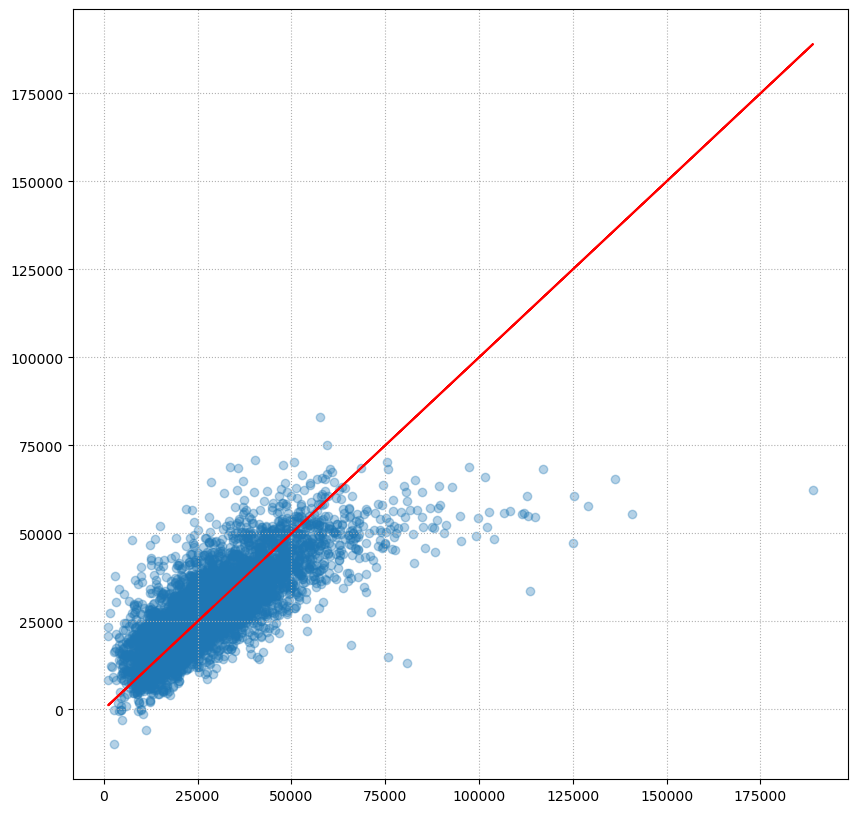

In [24]:
fig = plt.figure(figsize =(10, 10))
plt.scatter(y_test,y_pred , alpha=1/3)
plt.plot(y_test,y_test,color="red")

plt.grid(.5,ls=":")
plt.show()

## 2.5 QQ Plot of Linear Model Residuals

Text(0.5, 1.0, 'Model Residuals Q-Q Plot')

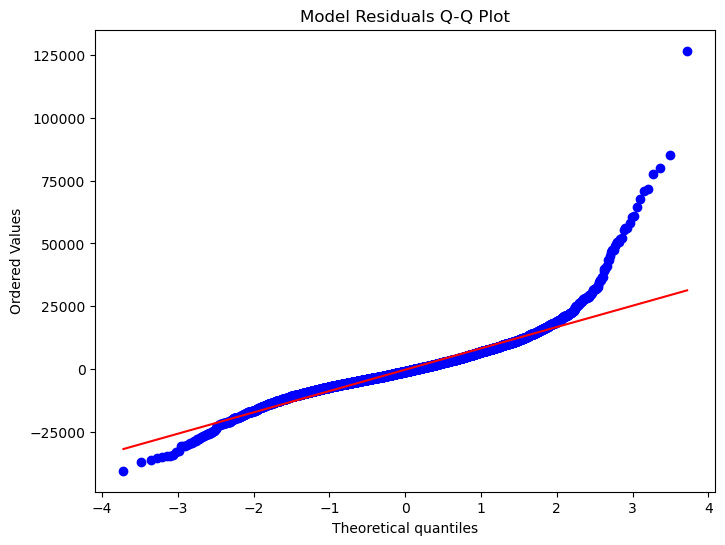

In [25]:
# Q Plot to visualize the accuracy of the model


res=y_test-y_pred
fig = plt.figure(figsize =(8, 6)) 
stats.probplot(res, dist="norm", plot= plt)
plt.title("Model Residuals Q-Q Plot")    

#### Fig: QQ plot shows that residual is not completely normaly distributed



## 2.6 Linear model Evaluation

In [26]:
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
RMSE=np.sqrt(np.mean(np.square(y_test-y_pred)))
print('RMSE: ', RMSE)

Mean Absolute Percentage Error (MAPE): 0.28415481279757837
R^2: 0.5802626282718357
RMSE:  8966.3011848338


In [27]:
RMSE

8966.3011848338

In [28]:
y_trainPred=reg.predict(X_train)

In [29]:
RMSEofTrain=np.sqrt(np.mean(np.square(y_train-y_trainPred)))

In [30]:
RMSEofTrain

9099.255965148379

## 2.7 Random Forest Regression with first approach (Partially cleaned dataset)

In [31]:
regr = RandomForestRegressor(n_estimators=200)
regr.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200)

In [32]:
yhat = regr.predict(X_test)

In [33]:
RMSE=np.sqrt(np.mean(np.square(y_test-yhat)))
RMSE

5842.364461549582

In [34]:
regr.feature_importances_


array([0.06154847, 0.12447846, 0.03261987, 0.00701885, 0.00986194,
       0.00700638, 0.00696766, 0.01926544, 0.26305737, 0.00320714,
       0.08361103, 0.02026725, 0.01500578, 0.27468368, 0.07140066])

### 2.7.1 Feature Importance 

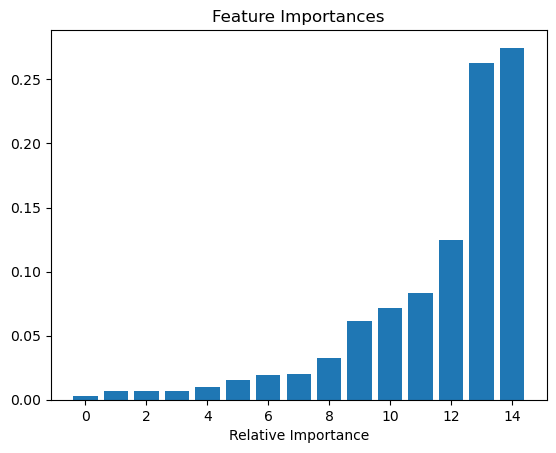

In [35]:
importances = regr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xlabel('Relative Importance')
plt.show()

# 3.0 Second Approach by removing more irrelevant data and better Cleaning

In [36]:
def column_value_filter(df, columnName, values, **kargs):  
    return df[df[columnName].isin(values)]

In [37]:
def convertToObject(df, columnName):
    return df[columnName].astype(object)

In [38]:
def convertToDateTime(df, columnName, dateFormat = "%d/%m/%Y"):
    return pd.to_datetime(df[columnName], format=dateFormat)

In [39]:
Data=pd.read_csv('Iceland_House_Prediction.csv')

In [40]:
Data.rename(columns={'ID of real estate':'Id', 'Date Of Purchase':'SaleDate', 'Value Of Real estate':'Price',
       'Type Of Property':'PropertyType', 'Id Of municipality':'MunicipalityId', 'Year Of Construction':'YearBuilt',
       'Floor Number':'FloorN', 'Elevator available':'ElevatorE', 'Square Meters Of Property':'M2',
       'No. Of Floors':'NFloor', 'No. Of Parking spaces':'NParking', 'No. of Bath Tubs':'NBathTub',
       'No. of showers':'NShowers', 'No. of Toilets':'NToilets', 'No. of Kitchens':'NKitchens', 'No. of rooms':'NRooms',
       'No. of living rooms':'NLivingroom', 'No. of storage spaces':'NStorages',
       'Measurement of completeness':'Completeness', 'Location Of Property':'Location',
       'Sub-location property':'Sublocation', 'Type of property':'TypeofProperty'},  inplace=True)

In [41]:
dataCleaned = Data.copy()

In [42]:
dataCleaned

,Id,SaleDate,Price,PropertyType,MunicipalityId,YearBuilt,FloorN,ElevatorE,M2,NFloor,...,NShowers,NToilets,NKitchens,NRooms,NLivingroom,NStorages,Completeness,Location,Sublocation,TypeofProperty
0,10580956,02/11/2011,18636,Residential House,0,01/01/1970,2,0,117.0,1,...,0,1,1,3,1,2,10.0,200,0,12
1,10779688,31/10/2011,17533,Residential House,0,01/01/1953,0,0,67.9,1,...,1,1,1,1,1,1,10.0,70,0,12
2,10712711,07/10/2011,14472,Residential House,0,01/01/1921,0,0,45.7,1,...,1,1,1,1,1,0,10.0,20,0,12
3,10774018,28/10/2011,14850,Residential House,0,01/01/1967,1,0,78.1,1,...,0,1,1,2,1,1,10.0,200,0,12
4,10891899,03/11/2011,20831,Residential House,0,01/01/1952,0,0,87.4,1,...,0,1,1,2,1,2,10.0,70,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34860,10719030,01/11/2011,25133,Town House,0,01/01/1981,1,0,128.2,2,...,0,2,1,4,2,0,10.0,160,0,11
34861,10077682,02/11/2011,14700,Residential House,0,01/01/1970,1,0,38.7,1,...,1,1,1,1,1,1,10.0,280,0,12
34862,10298834,26/10/2011,44896,Villa,0,01/01/1981,1,0,222.4,3,...,1,2,1,6,2,0,10.0,150,0,11
34863,10306230,02/11/2011,11698,Residential House,0,01/01/1975,2,0,48.4,1,...,0,1,1,1,1,0,10.0,160,0,12


In [43]:
# Date format change to Year integers for consistensy

dataCleaned["SaleDate"] = convertToDateTime(dataCleaned, "SaleDate").dt.year
dataCleaned["YearBuilt"] = convertToDateTime(dataCleaned, "YearBuilt").dt.year  

In [44]:
dataCleaned = dataCleaned.drop(["Id", "MunicipalityId", "Sublocation", "TypeofProperty"], axis=1)  ##Syed - Dropping some columns which are just identifiers and for FEATURE ENGINEERING (on basis of Varaiance Inflation Factor) 

In [45]:
# Get  columns whose data type is object i.e. string
# Finding all categorical Non numeric columns

filteredObjectColumns = dataCleaned.dtypes[dataCleaned.dtypes == np.dtype('object')].index  
listOfColumnNames = list(filteredObjectColumns)
print(listOfColumnNames)

['PropertyType']


## 3.1 Outlier Removal Using Distribution Percentage

In [46]:
# Outlier removal bleow 5% of total distinct value

def outlierRemovalByPercentage(df, excludedColumns, removalPercentage = 5):
    resultValueOptions = {}
    for i in df.loc[:, ~df.columns.isin(excludedColumns)].columns:
        value_percentage_difference = df[i].value_counts(normalize=True)*100 >= removalPercentage
        resultValueOptions[value_percentage_difference[
            value_percentage_difference].name] = value_percentage_difference[
            value_percentage_difference].index.values
    return resultValueOptions

In [47]:
# Feature Engineering

dataImputed = dataCleaned.copy()
continousExcludedColumns = ["Price", "M2", "YearBuilt"]
excludedColumns = continousExcludedColumns +  ["SaleDate", "Location", "Completeness"] 
for key,value in outlierRemovalByPercentage(
    dataImputed, excludedColumns + listOfColumnNames, 5).items():  # M2 have unique which are not repeated (Continous) so outliers can't be romved using percentage for these columns
    print(key,value)                                               # If we keep these columns then no of rows removed drastically on applying outlier filtering
    dataImputed = column_value_filter(dataImputed,key,value)

FloorN [1 2 3 4]
ElevatorE [0 1]
NFloor [1 2]
NParking [0 1]
NBathTub [1 0]
NShowers [0 1]
NToilets [1 2]
NKitchens [1]
NRooms [2 3 1 4]
NLivingroom [1 2]
NStorages [0 1 2]


In [48]:
dataImputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24631 entries, 0 to 34863
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SaleDate      24631 non-null  int64  
 1   Price         24631 non-null  int64  
 2   PropertyType  24631 non-null  object 
 3   YearBuilt     24630 non-null  float64
 4   FloorN        24631 non-null  int64  
 5   ElevatorE     24631 non-null  int64  
 6   M2            24631 non-null  float64
 7   NFloor        24631 non-null  int64  
 8   NParking      24631 non-null  int64  
 9   NBathTub      24631 non-null  int64  
 10  NShowers      24631 non-null  int64  
 11  NToilets      24631 non-null  int64  
 12  NKitchens     24631 non-null  int64  
 13  NRooms        24631 non-null  int64  
 14  NLivingroom   24631 non-null  int64  
 15  NStorages     24631 non-null  int64  
 16  Completeness  24631 non-null  float64
 17  Location      24631 non-null  int64  
dtypes: float64(3), int64(14), 

## 3.2 Outlier Removal using Inter Quartile Range

In [49]:
def remove_outlier_IQR(df):  # Way to remove outliers in continous columns like M2 and also discrete numerical values
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

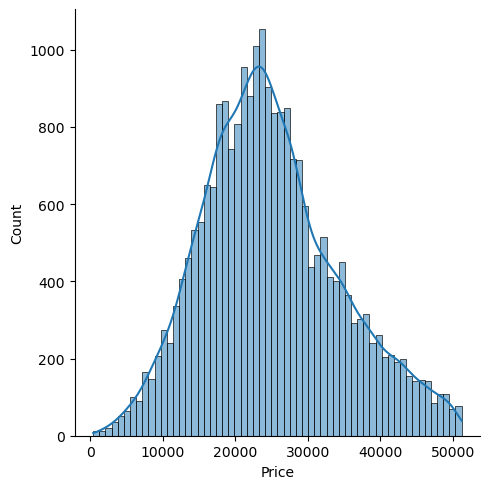

In [50]:
# Performing outlier removal for price
# Also tried with other continouns & discrete values but it did't improve accuracy

for column in ["Price"]:   
    outlierRemovedColumn = remove_outlier_IQR(dataImputed[column])
    dataImputed[column] = outlierRemovedColumn
    sn.displot(outlierRemovedColumn, kde=True)

## 3.3 One Hot Encoding of Categorical Parameters

In [51]:
# Applying OneHot Encoding on 'propertyType' colum which is an object and thus not accepted in reg model
# We converted propertyType values into Numerical BYTECODE to make it compatible with the models

dataImputed = dataImputed.dropna() 
dataImputed = pd.get_dummies(dataImputed, prefix=None,
                   dummy_na=False, columns=["PropertyType"], 
                   sparse=False, drop_first=True, dtype=None)
dataImputed.info(max_cols= 2000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23927 entries, 0 to 34863
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SaleDate                          23927 non-null  int64  
 1   Price                             23927 non-null  float64
 2   YearBuilt                         23927 non-null  float64
 3   FloorN                            23927 non-null  int64  
 4   ElevatorE                         23927 non-null  int64  
 5   M2                                23927 non-null  float64
 6   NFloor                            23927 non-null  int64  
 7   NParking                          23927 non-null  int64  
 8   NBathTub                          23927 non-null  int64  
 9   NShowers                          23927 non-null  int64  
 10  NToilets                          23927 non-null  int64  
 11  NKitchens                         23927 non-null  int64  
 12  NRoo

## 3.4 Variance Inflation Factor with Second Approach

    Used to find multicolinerality for each columns with other columns except Price

In [52]:
# Calculating VIF
def calc_vif(X):    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [53]:
dataFrames = []
df = dataImputed.copy()
dataFrames.append(df)


In [54]:
for i in dataFrames:
    vif = calc_vif(i.loc[:, ~i.columns.isin(["Price"])])
    print(vif)

                           variables           VIF
0                           SaleDate  1.007759e+00
1                          YearBuilt  1.602012e+00
2                             FloorN  1.359581e+00
3                          ElevatorE  1.479800e+00
4                                 M2  3.904332e+00
5                             NFloor  1.367629e+00
6                           NParking  1.373719e+00
7                           NBathTub  1.751719e+00
8                           NShowers  1.730768e+00
9                           NToilets  1.508289e+00
10                         NKitchens  1.920987e+06
11                            NRooms  2.721503e+00
12                       NLivingroom  1.272276e+00
13                         NStorages  1.050606e+00
14                      Completeness  1.024542e+00
15                          Location  1.375623e+00
16  PropertyType_Semi-Detached House  1.196339e+00
17           PropertyType_Town House  1.408255e+00
18                PropertyType_

In [55]:
# Model EVALUATION function for 2nd approach

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
    print('R^2:', metrics.r2_score(test_labels, predictions))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))   
    return accuracy

In [56]:
X=dataFrames[0].drop(['Price'], axis=1).values
y=dataFrames[0]['Price'].values

## 3.5 Splitting Dataset for 2nd Approach

In [57]:
## data set split - 70% train and 30% test (prediction)
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

## 3.6 Hyper Parameter Tuning

    Used Advanced Technique with Second Approach having Better Cleaned Data

    Used Hyper Pramater Tuning for finding the best combination of parameters to maximize the model performance

### 3.6.1 GridSearchCV

In [58]:
# Instead of doing hit and trial on randomforest parameters, Using HyperParameter Tuning gives us the best combination of parametrs

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [3, 4, 5, 10],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

### 3.6.2 Base Model (RandomForest) Metrics

In [59]:
# Fitting Random Forest Regression to the dataset
# create regressor object
regressor = RandomForestRegressor(n_estimators = 10, random_state = 45)

# fit the regressor with x and y data
reg = regressor.fit(X_train, y_train)
base_accuracy = evaluate(reg, X_test, y_test)

Model Performance
Mean Absolute Percentage Error (MAPE): 0.13221188931580022
R^2: 0.8449056160731143
Average Error: 2715.5796 degrees.
Accuracy = 86.78%.


In [60]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

## 3.7 Hyperparameter Tuned (GridSearch) Model Metrics

In [61]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Mean Absolute Percentage Error (MAPE): 0.12969795021920774
R^2: 0.8554041043721171
Average Error: 2634.2000 degrees.
Accuracy = 87.03%.


### 3.7.1 Metrics Improvement in Tuned Model 

In [62]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.29%.


In [63]:
y_pred=best_grid.predict(X_test)

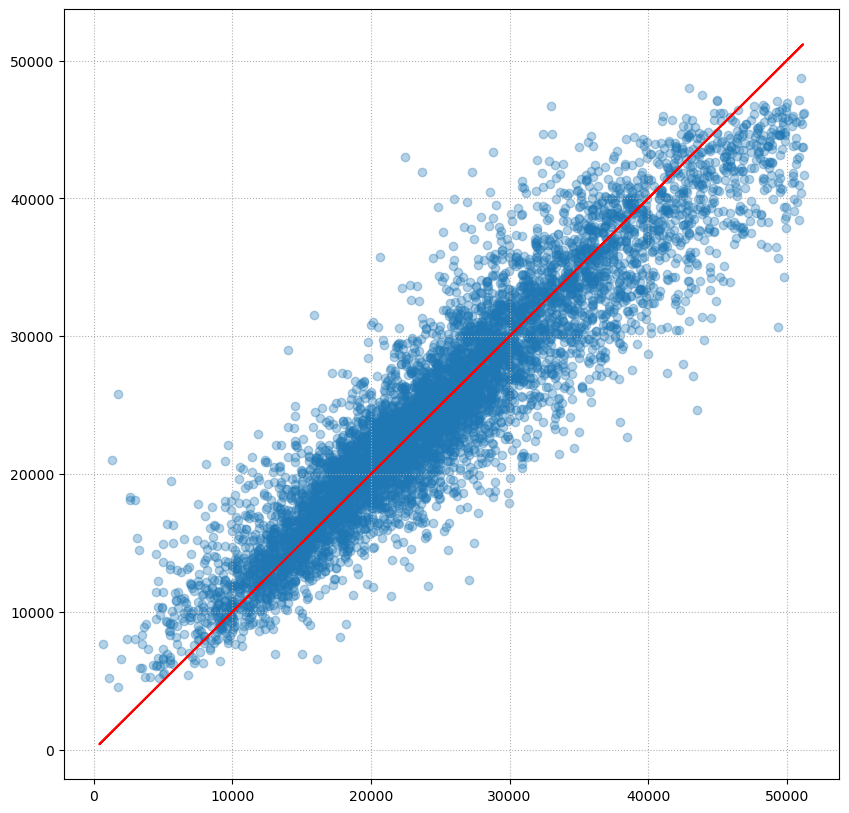

In [64]:
fig = plt.figure(figsize =(10, 10))
plt.scatter(y_test,y_pred , alpha=1/3)
plt.plot(y_train,y_train,color="red")

plt.grid(.5,ls=":")
plt.show()

## 3.8 QQ Plot of HyperParameter Tuned (Random Forest) Model Residuals

Text(0.5, 1.0, 'Model Residuals Q-Q Plot')

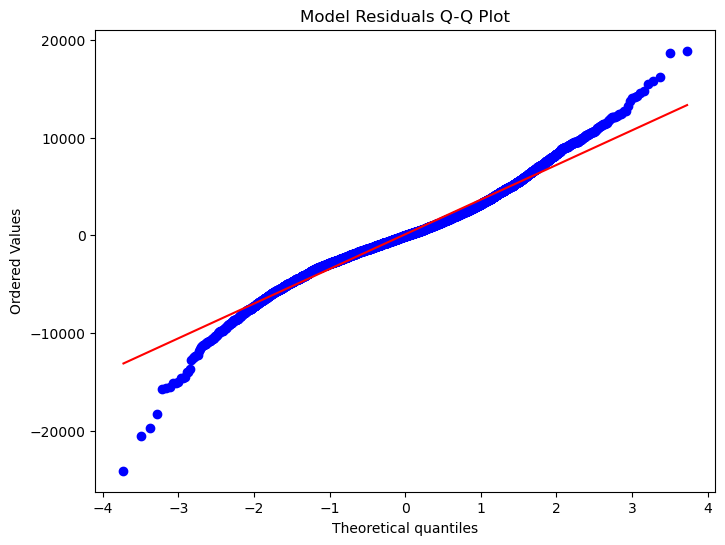

In [65]:
res=y_test-y_pred
fig = plt.figure(figsize =(8, 6)) 
stats.probplot(res, dist="norm", plot= plt)
plt.title("Model Residuals Q-Q Plot")

# 4.0 Results & Conclusion

By looking at RMS value and residual plot, we can infer that the tuned (GridSearch) random forest regression model in the second approach having cleaner data using IQR (Inter Quartile Range) gives us the best prediction of house prices.


We can declare that our cleaning method gives us the best section of data and uses hyperparameter tuning, which provides us with the best data features